__Задача 1__

Дана матрица объект-признак
```
X = [[ 1.22401313,  2.30868478,  3.03636353,  2.69287214],
     [-0.18757272,  1.30337355,  5.12093014,  3.46363202],
     [-0.81094525,  1.82463398,  5.79686488,  1.86159445],
     [ 0.75129018,  2.67392052,  3.65529809,  1.66746094],
     [ 0.00972362,  1.97367255,  2.50594319,  1.69755173],
     [-0.62972637,  0.77750764,  2.84124027,  4.54410559],
     [ 2.29536229,  1.81206697,  1.95026215,  1.51874636],
     [ 0.0920418 ,  2.26971361,  7.47708735,  2.61081203],
     [ 2.39252799,  3.17563985,  3.61420599,  5.10773362],
     [ 0.54983815,  2.87988651,  1.65752765,  1.59635987]]
```
и значения целевой переменной
```
y = [ 9.26193358,  9.700363  ,  8.67214805,  8.74796974,  6.18689108,
      7.53312713,  7.57643777, 12.44965478, 14.29010746,  6.68361218]
```

Подберите два признака (из четырёх) так, чтобы уровень линейной зависимости целевой переменной от значений этих признаков был максимальным. Другими словами, модель линейной регрессии на этих признаках должна давать наилучший результат. В качестве ответа запишите значение коэффициента детерминации для модели на этих признаках.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from itertools import product
from scipy import stats

In [3]:
X = np.array([[ 1.22401313,  2.30868478,  3.03636353,  2.69287214],
     [-0.18757272,  1.30337355,  5.12093014,  3.46363202],
     [-0.81094525,  1.82463398,  5.79686488,  1.86159445],
     [ 0.75129018,  2.67392052,  3.65529809,  1.66746094],
     [ 0.00972362,  1.97367255,  2.50594319,  1.69755173],
     [-0.62972637,  0.77750764,  2.84124027,  4.54410559],
     [ 2.29536229,  1.81206697,  1.95026215,  1.51874636],
     [ 0.0920418 ,  2.26971361,  7.47708735,  2.61081203],
     [ 2.39252799,  3.17563985,  3.61420599,  5.10773362],
     [ 0.54983815,  2.87988651,  1.65752765,  1.59635987]])

y = np.array([ 9.26193358,  9.700363  ,  8.67214805,  8.74796974,  6.18689108,
      7.53312713,  7.57643777, 12.44965478, 14.29010746,  6.68361218])

In [4]:
def noReflections(n, k, current=None, idx=0, symmetric=True):
    assert n >= 0 and k >= 0
    if n == 0 or k == 0:
        return
    if idx == 0:
        current = k * [0]
    if idx < k // 2:
        idx2 = k - idx - 1
        for i in range(n):
            current[idx] = i
            first = i if symmetric else 0
            for j in range(first, n):
                current[idx2] = j
                yield from noReflections(n, k, current, idx + 1, symmetric and (i == j))
    elif idx == k // 2 and (k % 2 == 1):
        for i in range(n):
            current[idx] = i
            yield tuple(current)
    else:
        yield tuple(current)

In [12]:
df = pd.DataFrame(X)
df["y"] = y
df.columns = ["x1","x2","x3","x4","y"]

pairs = list(noReflections(4, 2))
output= []
for a,b in pairs:
    lr = LinearRegression(fit_intercept=True).fit(X[:,[a,b]], y)
    lr_pred = lr.predict(X[:,[a,b]])
    output.append([a+1,b+1,r2_score(y,lr_pred)])

print(np.array(output))

print(f"Лучшее R2  - {np.array(output)[:,2].max()}")

[[1.         1.         0.12367649]
 [1.         2.         0.18113595]
 [1.         3.         0.76342462]
 [1.         4.         0.45329668]
 [2.         2.         0.1598867 ]
 [2.         3.         0.54794827]
 [2.         4.         0.60620558]
 [3.         3.         0.3394664 ]
 [3.         4.         0.62244199]
 [4.         4.         0.36350864]]
Лучшее R2  - 0.7634246238793151


__Задача 2__

Является ли значимым уравнение регрессии, полученное в предыдущей задаче? В качестве ответа запишите 1, если является, и 0 иначе.

(0.0, 0.5)

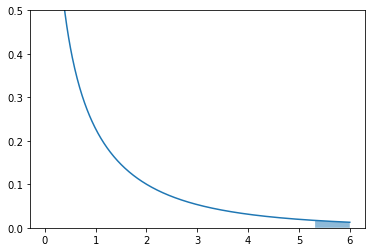

In [9]:
R1 = np.array(output)[:,2].max()
n = X.shape[0]
m = 1

k1 = m
k2 = n - m - 1

alpha = 0.05

t = stats.f.ppf(1 - alpha, k1, k2)

ox = np.linspace(0, 6, 500)
oy = stats.f.pdf(ox, k1, k2)

ox_right = np.linspace(t, 6, 100)
oy_right = stats.f.pdf(ox_right, k1, k2)

plt.plot(ox, oy)
plt.fill_between(ox_right, oy_right, alpha=0.5)

plt.ylim(0, 0.5)

In [11]:
F = (R1 / k1) / ((1 - R1) / k2)

print(f"'F' ({F:.2f}) значение больше чем 't' ({t:.2f}) \n Ответ = 1")

'F' (25.82) значение больше чем 't' (5.32) 
 Ответ = 1


__Задача 3__

Для проведения A/B-тестирования сайта интернет-магазина были получены следующие данные: страница `A` была посещена 2509 раз, из них 77 закончились совершением покупки, страница `B` была посещена 1465 раз, 60 из них закончились совершением покупки. Является ли значимым отличие конверсии на страницах `A` и `B`? В качестве ответа запишите 1, если является, и 0 иначе.

_Подсказка_. Реализуйте двухвыборочный t-тест. В качестве выборок здесь можно взять наборы меток совершения покупки (0 или 1) каждым посетителем.

In [13]:
x_A = [1 for i in range(77)]
x_A.extend([0 for i in range(2509-77)])
x_A = np.array(x_A)
n_A = x_A.shape[0]

x_B = [1 for i in range(60)]
x_B.extend([0 for i in range(1465-60)])
x_B = np.array(x_B)
n_B = x_B.shape[0]

sigma_A = x_A.std(ddof = 1)
sigma_B = x_B.std(ddof = 1)
sigma_A, sigma_B

(0.17250951379621338, 0.19825513126725994)

In [14]:
def sample_avg(sigma, n):
  return sigma**2 / n

sample_avg_A = sample_avg(sigma_A, n_A)
sample_avg_B = sample_avg(sigma_B, n_B)
sigma_delta = np.math.sqrt(sample_avg_A + sample_avg_B)
sigma_delta

0.006220171278295827

In [15]:
t = (x_A.mean() - x_B.mean()) / sigma_delta
t

-1.6504551408398205

In [16]:
df = (sigma_delta**4) / (sample_avg_A**2/(n_A - 1) + sample_avg_B**2/(n_B - 1))
df

2732.8025644352124

In [17]:
alpha = 0.05

t1 = stats.t.ppf(alpha / 2, df=df)
t2 = stats.t.ppf(1 - alpha / 2, df=df)
t1, t2

(-1.9608324352746576, 1.9608324352746571)

In [18]:
stats.ttest_ind(x_A, x_B, equal_var=False)

Ttest_indResult(statistic=-1.6504551408398205, pvalue=0.09896479217925898)

In [19]:
print("Ответ - 0")

Ответ - 0
